In [50]:
from google.colab import files
uploaded = files.upload()


Saving PR - Sheet1.csv to PR - Sheet1 (2).csv


In [51]:
import pandas as pd

df = pd.read_csv('PR - Sheet1.csv')

<ipython-input-49-5a1daf4605ae>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratios = df.groupby('cos_bin').apply(top10_ratio)
<ipython-input-49-5a1daf4605ae>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ratios = df.groupby('cos_bin').apply(top10_ratio)


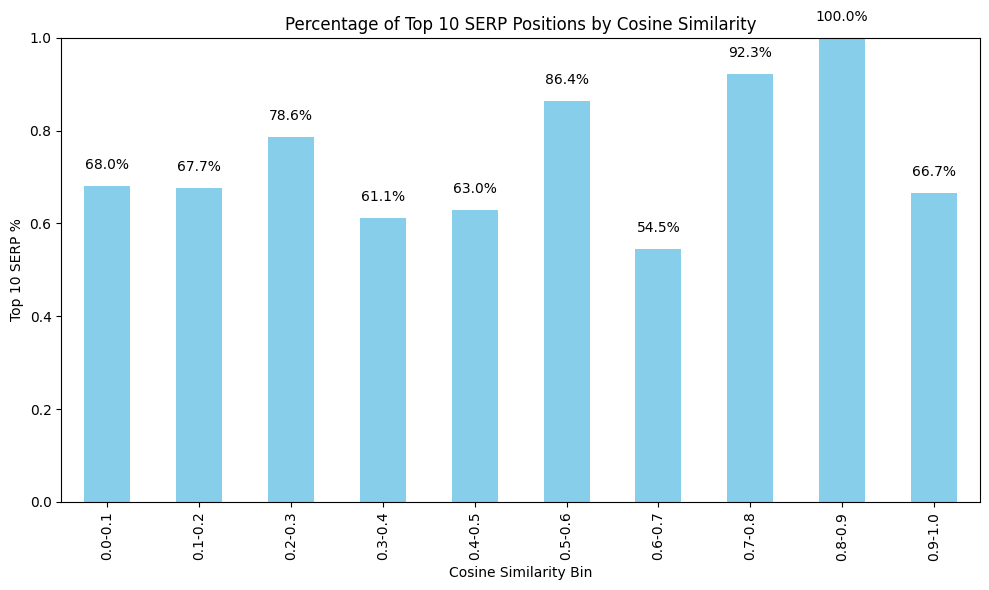

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Column names
cos_col = 'Cosine similarity between search term and title'
serp_col = 'SERP positon '  # Ensure this matches exactly with your DataFrame

# 1. Create bins for cosine similarity
bins = np.arange(0, 1.1, 0.1)
labels = [f"{round(b,1)}-{round(b+0.1,1)}" for b in bins[:-1]]
df['cos_bin'] = pd.cut(df[cos_col], bins=bins, labels=labels, include_lowest=True)

# 2. Calculate the ratio of SERP positions 1–10 in each bin
def top10_ratio(group):
    total = len(group)
    top10 = ((group[serp_col] >= 1) & (group[serp_col] <= 10)).sum()
    return top10 / total if total > 0 else 0

ratios = df.groupby('cos_bin').apply(top10_ratio)

# 3. Plot the percentage of top 10 results
plt.figure(figsize=(10, 6))
ax = ratios.plot(kind='bar', color='skyblue')

# Set labels and title
plt.xlabel('Cosine Similarity Bin')
plt.ylabel('Top 10 SERP %')
plt.title('Percentage of Top 10 SERP Positions by Cosine Similarity')
plt.ylim(0, 1)

# Annotate bars with %
for p in ax.patches:
    height = p.get_height()
    percentage = f"{height * 100:.1f}%"
    ax.text(p.get_x() + p.get_width() / 2, height + 0.03, percentage,
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [27]:
bins = [-1, 10, 100, df['Backlinks'].max()]
labels = ['0-10', '11-100', '100+']

df['backlink_bin'] = pd.cut(df['Backlinks'], bins=bins, labels=labels)

avg_serp_by_bin = df.groupby('backlink_bin')['SERP positon '].mean()

print(avg_serp_by_bin)


backlink_bin
0-10      38.837838
11-100    10.128571
100+       6.990991
Name: SERP positon , dtype: float64


<ipython-input-27-668bf6d4e572>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_serp_by_bin = df.groupby('backlink_bin')['SERP positon '].mean()


<ipython-input-28-839444692cff>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_serp_by_bin = df.groupby('Backlink_bin')['SERP positon '].mean()


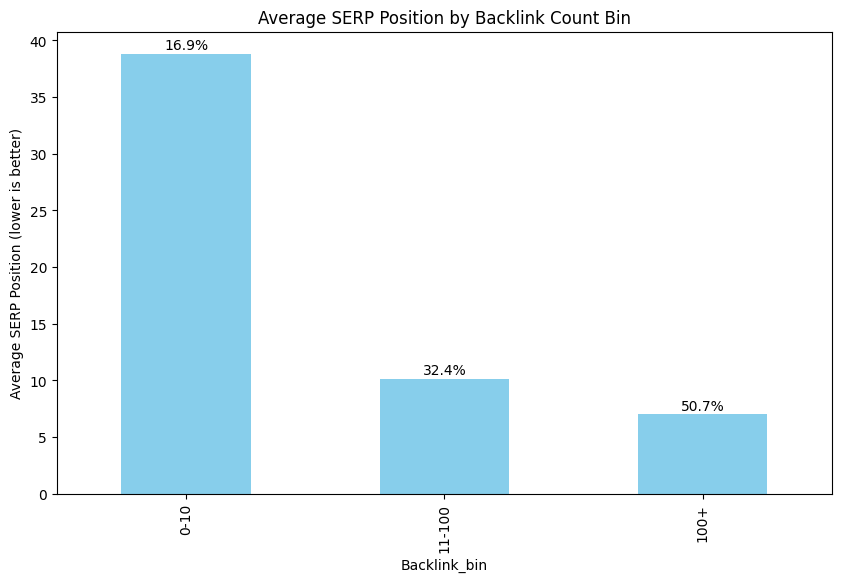

In [28]:
bins = [0, 10, 100, df['Backlinks'].max() + 1]
labels = ['0-10', '11-100', '100+']

df['Backlink_bin'] = pd.cut(df['Backlinks'], bins=bins, labels=labels, include_lowest=True)

avg_serp_by_bin = df.groupby('Backlink_bin')['SERP positon '].mean()

counts = df['Backlink_bin'].value_counts().reindex(avg_serp_by_bin.index)
percentages = (counts / counts.sum()) * 100

plt.figure(figsize=(10,6))
ax = avg_serp_by_bin.plot(kind='bar', color='skyblue')
plt.ylabel('Average SERP Position (lower is better)')
plt.title('Average SERP Position by Backlink Count Bin')

# Add percentage labels above each bar
for i, p in enumerate(ax.patches):
    height = p.get_height()
    percent = percentages.iloc[i]
    ax.text(p.get_x() + p.get_width() / 2, height + 0.1, f'{percent:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()


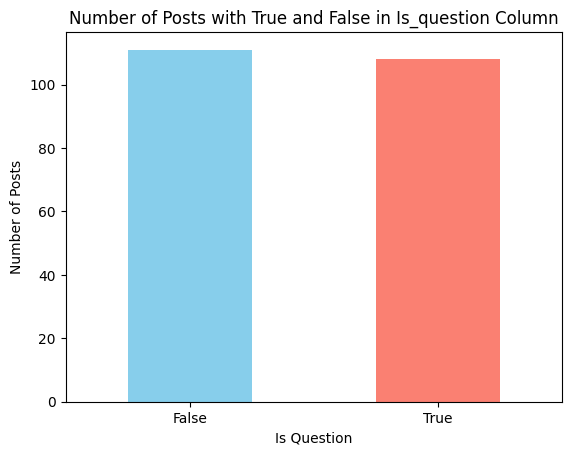

In [29]:
counts = df['Is_question'].value_counts()

counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Is Question')
plt.ylabel('Number of Posts')
plt.title('Number of Posts with True and False in Is_question Column')
plt.xticks(ticks=[0,1], labels=['False', 'True'], rotation=0)
plt.show()


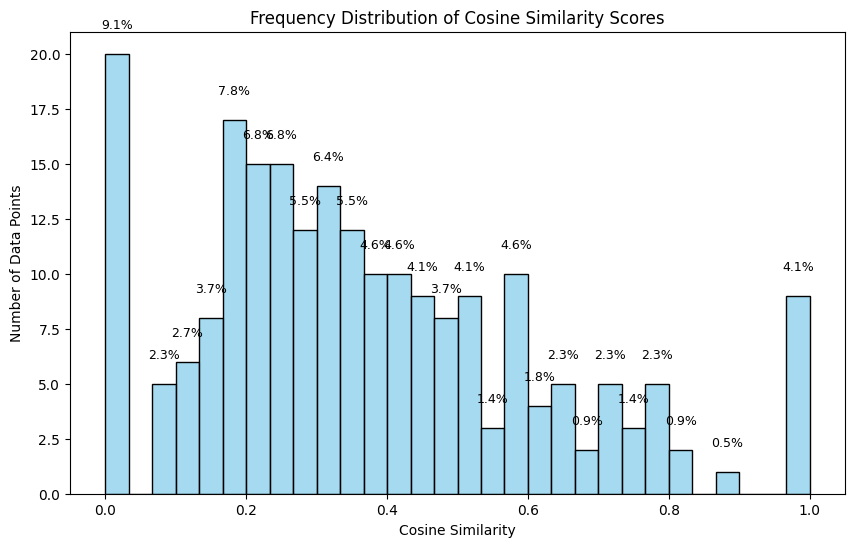

In [30]:
import seaborn as sns

plt.figure(figsize=(10,6))

ax = sns.histplot(df['Cosine similarity between search term and title'], bins=30, color='skyblue', edgecolor='black')

total = len(df['Cosine similarity between search term and title'])

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = 100 * height / total
        ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{percentage:.1f}%',
                ha='center', va='bottom', fontsize=9)

plt.title('Frequency Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Number of Data Points')
plt.show()


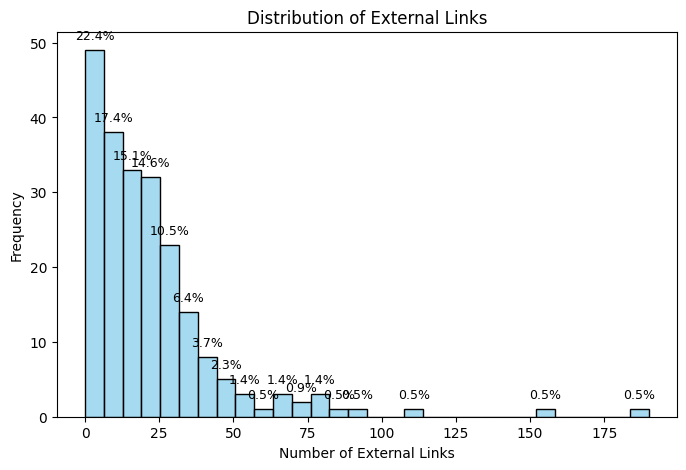

In [31]:
plt.figure(figsize=(8,5))
ax = sns.histplot(df['External links'], bins=30, color='skyblue', edgecolor='black')

plt.title('Distribution of External Links')
plt.xlabel('Number of External Links')
plt.ylabel('Frequency')

total = len(df['External links'])

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = 100 * height / total
        ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{percentage:.1f}%',
                ha='center', va='bottom', fontsize=9)

plt.show()


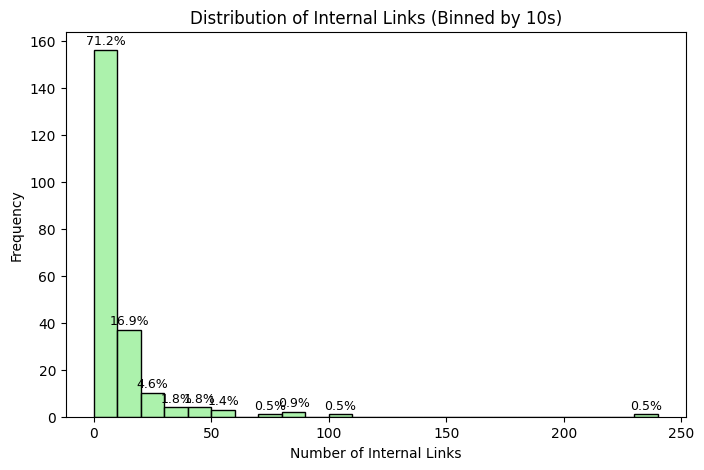

In [32]:
bins = list(range(0, df['Internal links'].max() + 10, 10))

plt.figure(figsize=(8,5))

ax = sns.histplot(df['Internal links'], bins=bins, color='lightgreen', edgecolor='black')

plt.title('Distribution of Internal Links (Binned by 10s)')
plt.xlabel('Number of Internal Links')
plt.ylabel('Frequency')

total = len(df['Internal links'])

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = 100 * height / total
        # Position label at center of each bin
        ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{percentage:.1f}%',
                ha='center', va='bottom', fontsize=9)

plt.show()


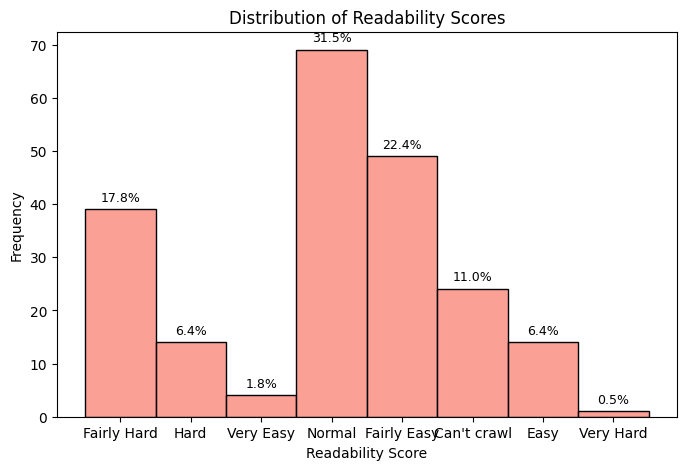

In [33]:
plt.figure(figsize=(8,5))
ax = sns.histplot(df['Readability'], bins=30, color='salmon', edgecolor='black')

plt.title('Distribution of Readability Scores')
plt.xlabel('Readability Score')
plt.ylabel('Frequency')

total = len(df['Readability'])

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = 100 * height / total
        ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{percentage:.1f}%',
                ha='center', va='bottom', fontsize=9)

plt.show()


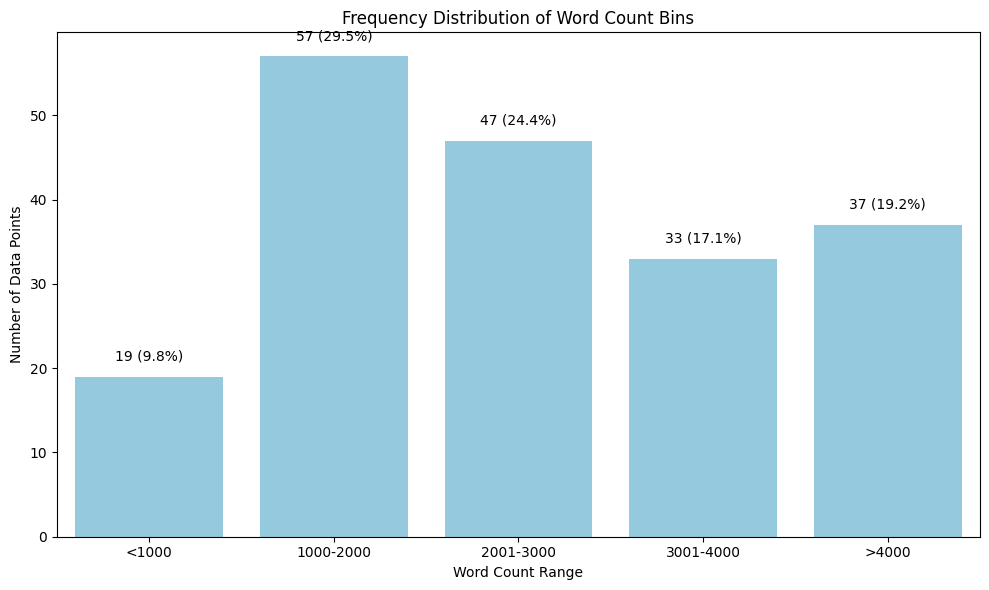

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

bins = [0, 999, 2000, 3000, 4000, np.inf]
labels = ['<1000', '1000-2000', '2001-3000', '3001-4000', '>4000']

df['WordCount_Bin'] = pd.cut(df['Word count'], bins=bins, labels=labels, right=True)

bin_counts = df['WordCount_Bin'].value_counts().sort_index()

plot_df = bin_counts.reset_index()
plot_df.columns = ['WordCount_Bin', 'Frequency']

plt.figure(figsize=(10, 6))
sns.barplot(x='WordCount_Bin', y='Frequency', data=plot_df, color='skyblue')

plt.title('Frequency Distribution of Word Count Bins')
plt.xlabel('Word Count Range')
plt.ylabel('Number of Data Points')

total = plot_df['Frequency'].sum()
for i, row in plot_df.iterrows():
    percentage = 100 * row['Frequency'] / total
    plt.text(i, row['Frequency'] + total * 0.01, f"{row['Frequency']} ({percentage:.1f}%)", ha='center')

plt.tight_layout()
plt.show()


In [38]:
def categorize_da(da):
    if da <= 30:
        return 'Low DA (0-30)'
    elif da <= 60:
        return 'Mid DA (31-60)'
    else:
        return 'High DA (61-100)'

df['DA_category'] = df['DA'].apply(categorize_da)


<ipython-input-40-25c88556084d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_serp_by_da.index, y=avg_serp_by_da.values, palette=['lightcoral', 'gold', 'seagreen'])


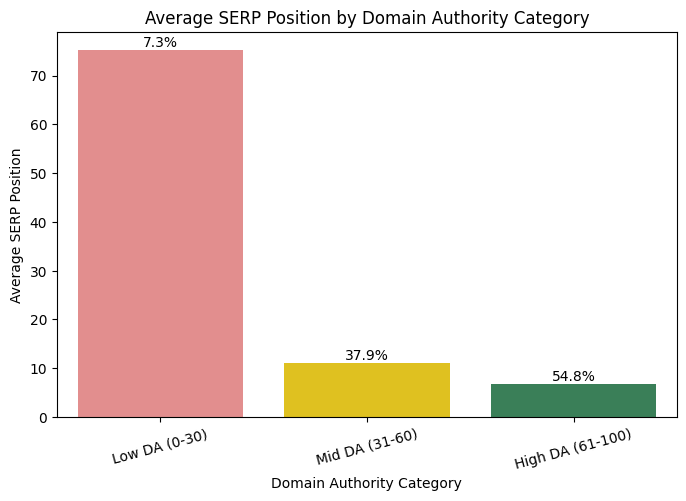

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_serp_by_da = df.groupby('DA_category')['SERP positon '].mean().reindex(['Low DA (0-30)', 'Mid DA (31-60)', 'High DA (61-100)'])

counts = df['DA_category'].value_counts().reindex(avg_serp_by_da.index)
percentages = (counts / counts.sum()) * 100

plt.figure(figsize=(8,5))
ax = sns.barplot(x=avg_serp_by_da.index, y=avg_serp_by_da.values, palette=['lightcoral', 'gold', 'seagreen'])

plt.title('Average SERP Position by Domain Authority Category')
plt.ylabel('Average SERP Position')
plt.xlabel('Domain Authority Category')
plt.xticks(rotation=15)

for i, p in enumerate(ax.patches):
    height = p.get_height()
    percent = percentages.iloc[i]
    ax.text(p.get_x() + p.get_width() / 2, height + 0.05, f'{percent:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()


In [42]:
da_counts = df['DA_category'].value_counts().reindex(['Low DA (0-30)', 'Mid DA (31-60)', 'High DA (61-100)'])

da_freq_percent = (da_counts / da_counts.sum()) * 100

print(da_freq_percent)


DA_category
Low DA (0-30)        7.305936
Mid DA (31-60)      37.899543
High DA (61-100)    54.794521
Name: count, dtype: float64


DA_category
Low DA (0-30)        7.305936
Mid DA (31-60)      37.899543
High DA (61-100)    54.794521
Name: count, dtype: float64


<ipython-input-43-17e881b09dce>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=da_freq_percent.index, y=da_freq_percent.values,


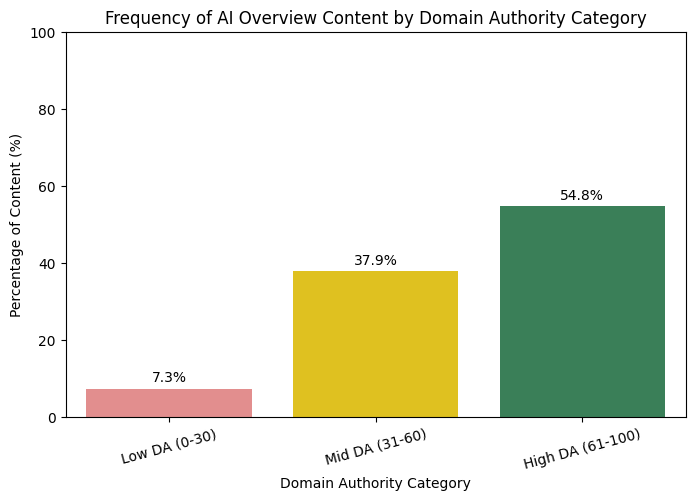

In [43]:
da_counts = df['DA_category'].value_counts().reindex(['Low DA (0-30)', 'Mid DA (31-60)', 'High DA (61-100)'])

da_freq_percent = (da_counts / da_counts.sum()) * 100

print(da_freq_percent)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

ax = sns.barplot(x=da_freq_percent.index, y=da_freq_percent.values,
                 palette=['lightcoral', 'gold', 'seagreen'])

plt.title('Frequency of AI Overview Content by Domain Authority Category')
plt.ylabel('Percentage of Content (%)')
plt.xlabel('Domain Authority Category')
plt.ylim(0, 100)
plt.xticks(rotation=15)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height + 1, f'{height:.1f}%',
            ha='center', va='bottom', fontsize=10)

plt.show()


In [44]:
print(df[['Word count', 'Internal links', 'External links']].describe())


         Word count  Internal links  External links
count    219.000000      219.000000      219.000000
mean    2710.146119        9.958904       21.707763
std     3424.489611       21.641854       23.971629
min        0.000000        0.000000        0.000000
25%     1210.000000        1.000000        7.000000
50%     2152.000000        4.000000       15.000000
75%     3356.500000       11.000000       28.000000
max    42249.000000      238.000000      190.000000


<ipython-input-45-f980f87c7176>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=freq.index, y=freq.values, palette='viridis')


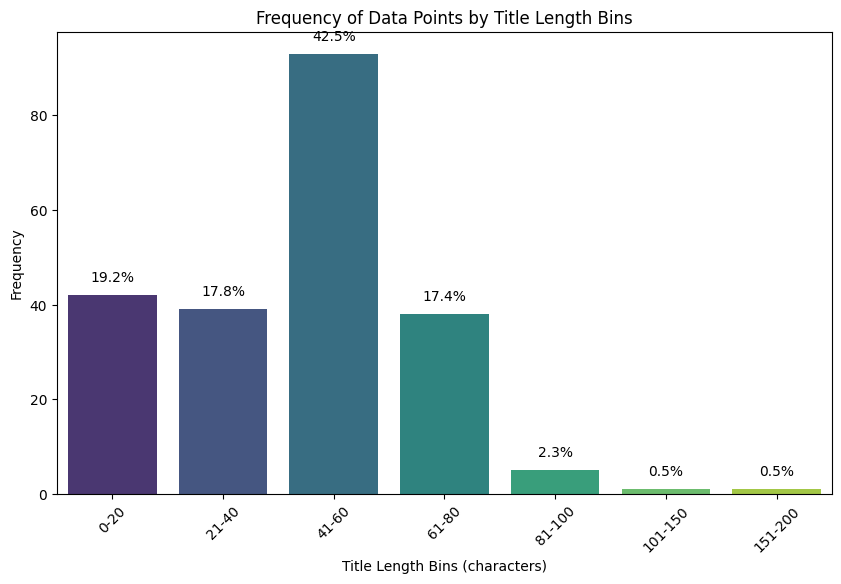

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

max_length = df['Title length (chars)'].max()

base_bins = [0, 20, 40, 60, 80, 100, 150, 200]

if max_length + 1 > base_bins[-1]:
    bins = base_bins + [max_length + 1]
else:
    bins = base_bins

labels = ['0-20', '21-40', '41-60', '61-80', '81-100', '101-150', '151-200', f'201-{int(max_length)}'][:len(bins)-1]

df['Title_length_bin'] = pd.cut(df['Title length (chars)'], bins=bins, labels=labels, include_lowest=True)

freq = df['Title_length_bin'].value_counts().sort_index()

total = freq.sum()
percentages = (freq / total) * 100

plt.figure(figsize=(10,6))
ax = sns.barplot(x=freq.index, y=freq.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Title Length Bins (characters)')
plt.ylabel('Frequency')
plt.title('Frequency of Data Points by Title Length Bins')

for i, p in enumerate(ax.patches):
    height = p.get_height()
    percent = percentages.iloc[i]
    ax.text(p.get_x() + p.get_width() / 2, height + total*0.01, f'{percent:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()


<ipython-input-46-1a6c773aa875>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DA_category', y='Readability', data=df, palette=['lightcoral', 'gold', 'seagreen'])


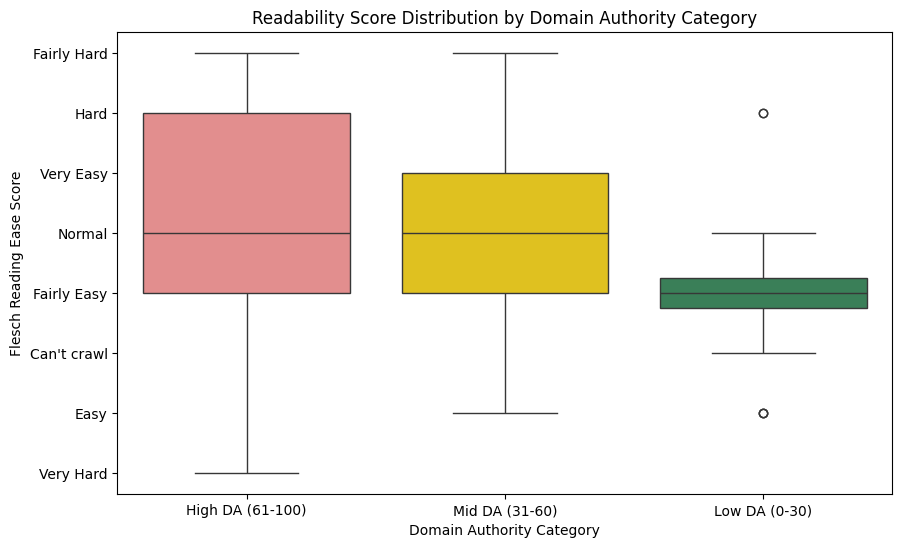

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='DA_category', y='Readability', data=df, palette=['lightcoral', 'gold', 'seagreen'])
plt.title('Readability Score Distribution by Domain Authority Category')
plt.xlabel('Domain Authority Category')
plt.ylabel('Flesch Reading Ease Score')
plt.show()


In [47]:
readability_stats = df.groupby('DA_category')['Readability'].describe()
print(readability_stats)


                 count unique          top freq
DA_category                                    
High DA (61-100)   117      8       Normal   35
Low DA (0-30)       16      5  Fairly Easy    8
Mid DA (31-60)      81      7       Normal   32


<ipython-input-48-ea7883466c2a>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Readability', y='Frequency', data=plot_df, palette='Blues_d')


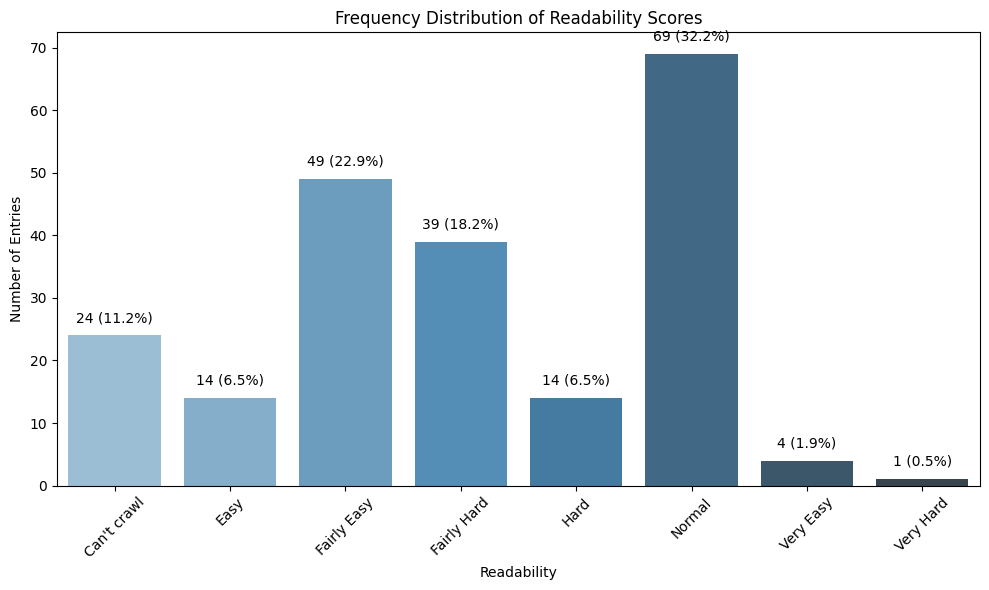

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

if 'Readbaility' in df.columns:
    df.rename(columns={'Readbaility': 'Readability'}, inplace=True)

readability_counts = df['Readability'].value_counts().sort_index()

plot_df = readability_counts.reset_index()
plot_df.columns = ['Readability', 'Frequency']

plt.figure(figsize=(10, 6))
sns.barplot(x='Readability', y='Frequency', data=plot_df, palette='Blues_d')

plt.title('Frequency Distribution of Readability Scores')
plt.xlabel('Readability')
plt.ylabel('Number of Entries')

total = plot_df['Frequency'].sum()
for i, row in plot_df.iterrows():
    percentage = 100 * row['Frequency'] / total
    plt.text(i, row['Frequency'] + total * 0.01,
             f"{row['Frequency']} ({percentage:.1f}%)",
             ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
